In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
#deterministic
df_objective_functions_deterministic=pd.read_csv('./Results_To_Plot/pareto_obj_gen99.csv',header=None, 
names = ['chauffage', 'inconfort', 'cout'])
df_decision_parametres_deterministic=pd.read_csv('./Results_To_Plot/pareto_param_gen99.csv', header=None, 
names = ['ep_murs_ext', 'ep_plancher_haut', 'ep_plancher_bas', 'type_fenetre'])

#nomass
df_objective_functions_nomass=pd.read_csv('./Results_To_Plot/pareto_obj_gen72.csv',header=None, 
names = ['chauffage', 'inconfort', 'cout'])
df_decision_parametres_nomass=pd.read_csv('./Results_To_Plot/pareto_param_gen72.csv', header=None, 
names = ['ep_murs_ext', 'ep_plancher_haut', 'ep_plancher_bas', 'type_fenetre'])

In [114]:
df_deterministic= pd.concat([df_objective_functions_deterministic,df_decision_parametres_deterministic], axis=1)
df_nomass= pd.concat([df_objective_functions_nomass,df_decision_parametres_nomass], axis=1)

In [115]:
df_deterministic.head()

,chauffage,inconfort,cout,ep_murs_ext,ep_plancher_haut,ep_plancher_bas,type_fenetre
0,90.72,253.037026,21195.426443,50.0,45.0,45.0,0.0
1,90.76,250.721744,21138.411320,50.0,42.0,45.0,0.0
2,90.79,249.475795,21012.653104,50.0,45.0,42.0,0.0
3,91.03,249.283179,21222.412369,50.0,40.0,47.0,0.0
4,91.48,247.424923,20978.914118,50.0,40.0,43.0,0.0


In [116]:
df_nomass.head()

,chauffage,inconfort,cout,ep_murs_ext,ep_plancher_haut,ep_plancher_bas,type_fenetre
0,219.41,213.881026,21458.540342,48.0,45.0,50.0,0.0
1,229.85,216.394051,20075.278901,45.0,45.0,30.0,0.0
2,239.54,215.196308,21109.324879,45.0,35.0,50.0,0.0
3,240.07,214.571385,21375.796383,45.0,49.0,50.0,0.0
4,245.07,210.923897,20180.611085,40.0,49.0,35.0,0.0


In [123]:
#df.plot.scatter(x='chauffage', y='cout', c = 'inconfort',colormap='viridis', s='type_fenetre')

def plot(df,figurename):
    x=df['chauffage']/97.5
    y=df['cout']/97.5
    z=df['inconfort']
    type_fenetre=df['type_fenetre']

    fig = plt.figure()
    fig.set_size_inches(15,10)

    axe1 = plt.subplot2grid((2,2),(0,0))
    axe1.set_ylabel('Cout global actualisé en euros/m2')
    plot1=axe1.scatter(x, y, c=z, s=type_fenetre*20)
    plt.colorbar(plot1,ax=axe1,label="Heures d'inconfort (T>Tconf+2°C)")

    axe2 = plt.subplot2grid((2,2),(1,0))
    axe2.set_ylabel("Heures d'inconfort (T>Tconf+2°C)")
    axe2.set_xlabel("Besoins de chauffage kWh/m2")
    plot2=axe2.scatter(x, z, c=y, s=type_fenetre*20)
    plt.colorbar(plot2,ax=axe2,label="Cout global actualisé en euros")

    axe3 = plt.subplot2grid((2,2),(1,1))
    axe3.set_xlabel("Cout global actualisé en euros/m2")
    plot3 = axe3.scatter(y, z, c=x, s=type_fenetre*20)
    plt.colorbar(plot3,ax=axe3,label="Besoins de chauffage kWh/m2")

    fig.legend(loc="right")
    plt.savefig(figurename+'.png')
    plt.close

No handles with labels found to put in legend.


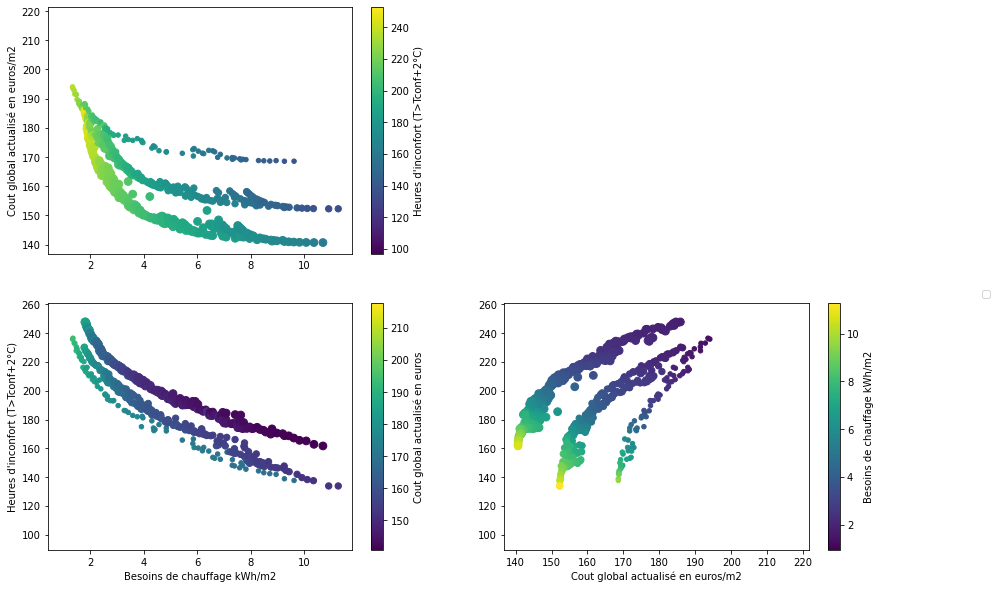

In [124]:
#deterministic
plot(df_deterministic,'deterministic')

No handles with labels found to put in legend.


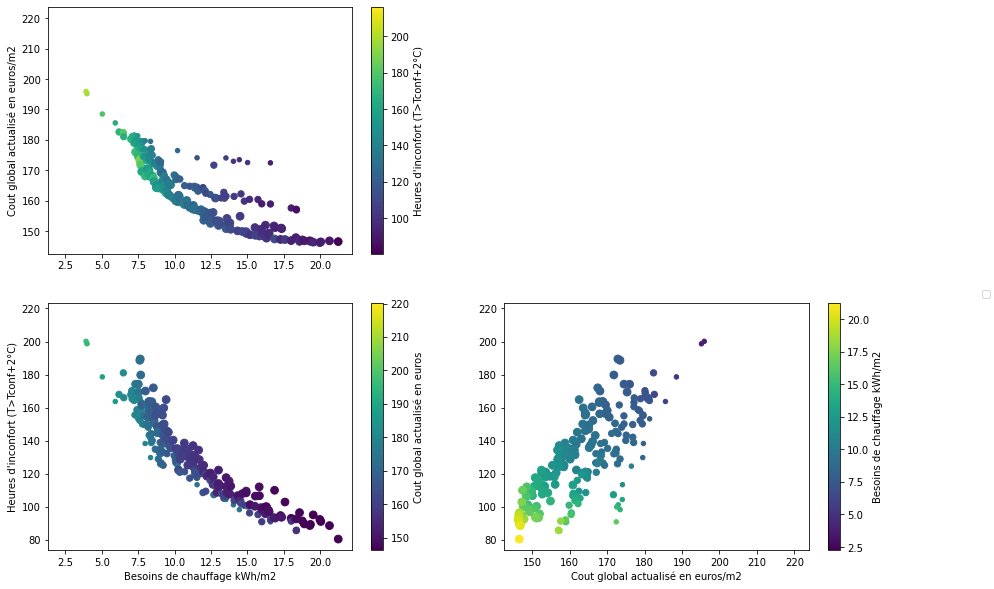

In [125]:
#nomass
plot(df_nomass,'nomass')